## **Problem Statement**
**Default risk is the chance that companies or individuals will be unable to make the required payments on their debt obligations. In other words, credit default risk is the probability that if you lend money, there is a chance that they won’t be able to give the money back on time. Lenders and investors are exposed to default risk in virtually all forms of credit extensions. To mitigate the impact of default risk, lenders often impose charges that correspond to the debtor’s level of default risk. A higher level of risk leads to a higher required return.So we are building the machine learning model to predict credit defult based on different parameter. We are building simple model from freely availabe data on the internet**


## Importing the necessary libraries


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("creditcard.csv") #importing dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.dtypes #printing all the column name

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
data.size # return size of the dataframe

8829017

In [7]:
data.shape # return shape of the dataframe

(284807, 31)

In [8]:
data['Class'].value_counts() # return the count of the Target catgories

0    284315
1       492
Name: Class, dtype: int64

### EDA

In [9]:
data.isnull().sum() # Return the sum of null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

► Due to confidentiality issue, original features V1, V2,... V28 have been transformed using PCA, however, my guess is that these features might be credit card number, expiry date, CVV, cardholder name, transaction location, transaction date-time, etc.

► Only features which have not been transformed with PCA are 'Time',  'Amount' and 'Class'.

In [10]:
#Checking the highly imbalanced target variable.
t=data['Class']
t.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:ylabel='Class'>

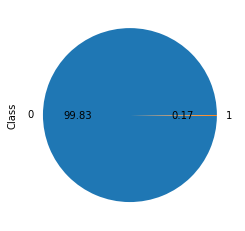

In [11]:
t.value_counts().plot.pie(autopct='%.2f')

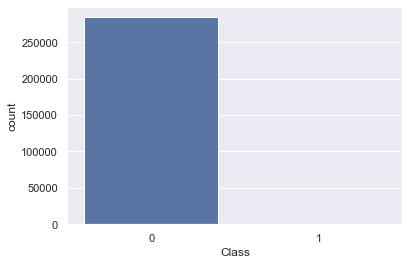

In [12]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Class", data=data)

# Balancing the Data Set

In [13]:
X = data.drop(['Class'], 1)
Y = data.Class

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)



<AxesSubplot:ylabel='Class'>

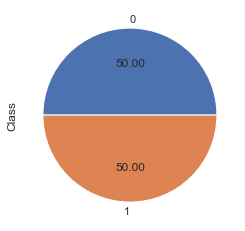

In [16]:
y_res.value_counts().plot.pie(autopct='%.2f')

 ## Model Evaluation

In [17]:
# Seperate the given Data Set into Training and Test Data Sets 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=2)

In [18]:
X_train.shape

(398041, 30)

In [19]:
y_train.shape

(398041,)

In [20]:
y_train.value_counts()

0    199330
1    198711
Name: Class, dtype: int64

## Applying Logistic Regression Model

In [21]:
# Applying Logistic Regression Model on the Test Data Set
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train, y_train) # default max_iter is 100
y_pred = lr_model.predict(X_test)
print(y_pred[:5])

[1 0 1 0 1]


In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9734918429676005

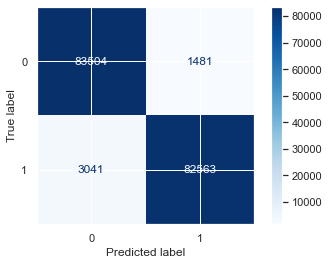

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_model, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

In [24]:
from sklearn.metrics import classification_report

# print("accuracy of the model :"+ str(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.965     0.983     0.974     84985
           1      0.982     0.964     0.973     85604

    accuracy                          0.973    170589
   macro avg      0.974     0.974     0.973    170589
weighted avg      0.974     0.973     0.973    170589



## Applying Random Forrest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Random forest Classifier
rf_cfl = RandomForestClassifier(n_estimators = 200, 
                                 max_features = 3, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(X_train, y_train)
y_pred1 = rf_cfl.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred1)

0.9998886211889395

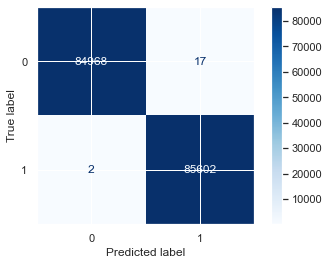

In [38]:
plot_confusion_matrix(rf_cfl, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

In [39]:
print(classification_report(y_test, y_pred1, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     84985
           1      1.000     1.000     1.000     85604

    accuracy                          1.000    170589
   macro avg      1.000     1.000     1.000    170589
weighted avg      1.000     1.000     1.000    170589



# **Decision Tree Classifier**

In [25]:
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(max_depth=20).fit(X_train,y_train)
decision_pred= decision_tree.predict(X_test)
print(accuracy_score(y_test,decision_pred))

0.9977606996934152


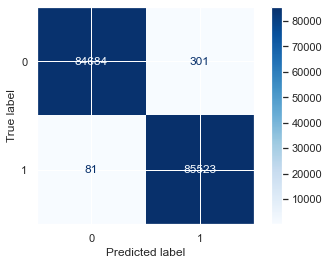

In [26]:
plot_confusion_matrix(decision_tree, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

In [27]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.965     0.983     0.974     84985
           1      0.982     0.964     0.973     85604

    accuracy                          0.973    170589
   macro avg      0.974     0.974     0.973    170589
weighted avg      0.974     0.973     0.973    170589



In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


decision: ROC AUC=0.998
Logistic: ROC AUC=0.974
RandomForest: ROC AUC=1.000


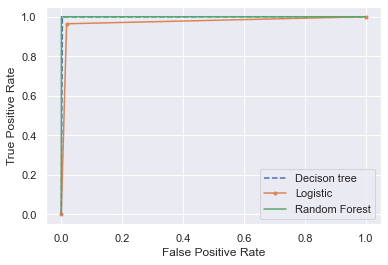

In [41]:
dt_auc = roc_auc_score(y_test,decision_pred)
lr_auc = roc_auc_score(y_test,y_pred)
rf_auc = roc_auc_score(y_test,y_pred1)
print('decision: ROC AUC=%.3f' % (dt_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('RandomForest: ROC AUC=%.3f' % (rf_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, decision_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred1)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Decison tree')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()